In [2]:
# let's load the model trained on machine 1.csv, and try to test it on other machines, see what it gives!

In [16]:
# loading the model
from tensorflow import keras
model = keras.models.load_model('./test_model')

In [17]:
import numpy as np
%matplotlib inline 
import pandas as pd
import tensorflow as tf
from IPython.display import display, Image
import cv2
from PIL import Image
from tqdm import tqdm
from keras.applications.vgg19 import VGG19
from keras.utils.vis_utils import plot_model
import gc
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [33]:
# let's load the dataset

df = pd.read_csv("./91.csv", ";\t")
df['Timestamp [ms]'] = pd.to_datetime(df['Timestamp [ms]'])
df = df.set_index('Timestamp [ms]')

C:\Users\XL892PG\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\XL892PG\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [34]:
df.drop('CPU cores', inplace=True, axis=1)
df.drop('CPU usage [%]', inplace=True, axis=1)
df.drop('CPU capacity provisioned [MHZ]', inplace=True, axis=1)
df.drop('Memory capacity provisioned [KB]', inplace=True, axis=1)
df.drop('Memory usage [KB]', inplace=True, axis=1)
df.drop('Disk read throughput [KB/s]', inplace=True, axis=1)
df.drop('Disk write throughput [KB/s]', inplace=True, axis=1)
df.drop('Network received throughput [KB/s]', inplace=True, axis=1)
df.drop('Network transmitted throughput [KB/s]', inplace=True, axis=1)

In [35]:
# create train test split
train_length = round(len(df)*0.8)
test_length = len(df) - train_length
train = df.iloc[0:train_length]
test = df.iloc[train_length:]

In [36]:
# let's scale the values of the dataset
scaler = MinMaxScaler(feature_range = (0,1))
train_scaled = pd.DataFrame(scaler.fit_transform(train), columns=df.columns)
test_scaled = pd.DataFrame(scaler.fit_transform(test), columns=df.columns)

In [37]:
def train_generator(dataset, n_lags=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - n_lags - 1):
        a = dataset.iloc[i:(i+n_lags)].to_numpy()
        dataX.append(a)
        dataY.append(dataset.iloc[i + n_lags].to_numpy())
    return (np.array(dataX), np.array(dataY))

In [38]:
TIME_STEPS = 50
X_train, y_train = train_generator(train_scaled, n_lags = TIME_STEPS)
X_test_scaled, y_test_scaled = train_generator(test_scaled, n_lags=TIME_STEPS)
X_test, y_test = train_generator(test, n_lags=TIME_STEPS)

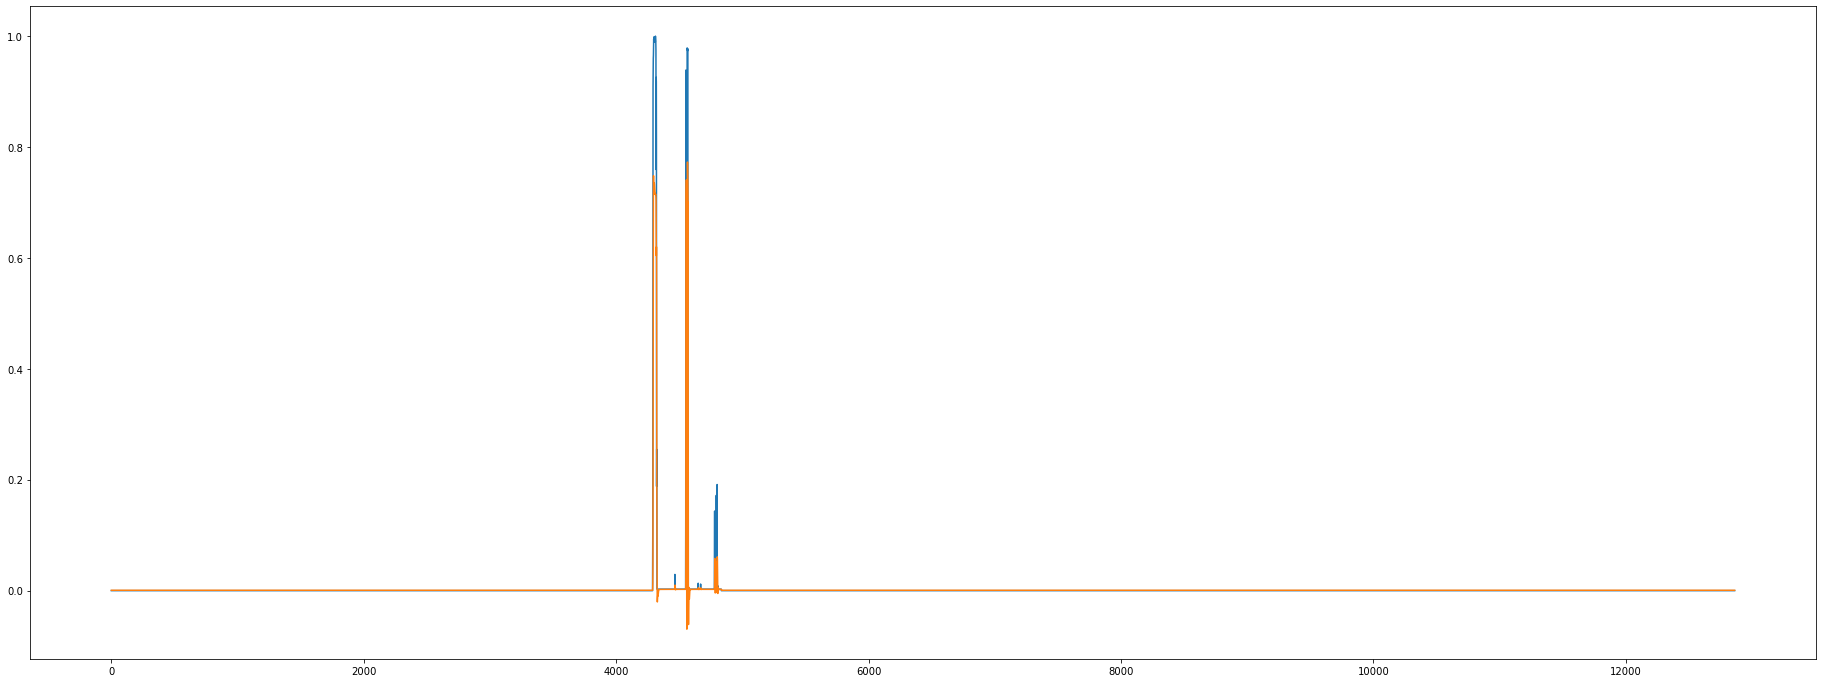

In [25]:
preds = model.predict(X_train)
preds = scaler.inverse_transform(preds)
plt.rcParams["figure.figsize"] = (32,12)
TestY = pd.DataFrame(y_train)
PredY = pd.DataFrame(preds)

plot_max = plt.figure(1)
plt.plot(TestY)
plt.plot(PredY)
plt.show()

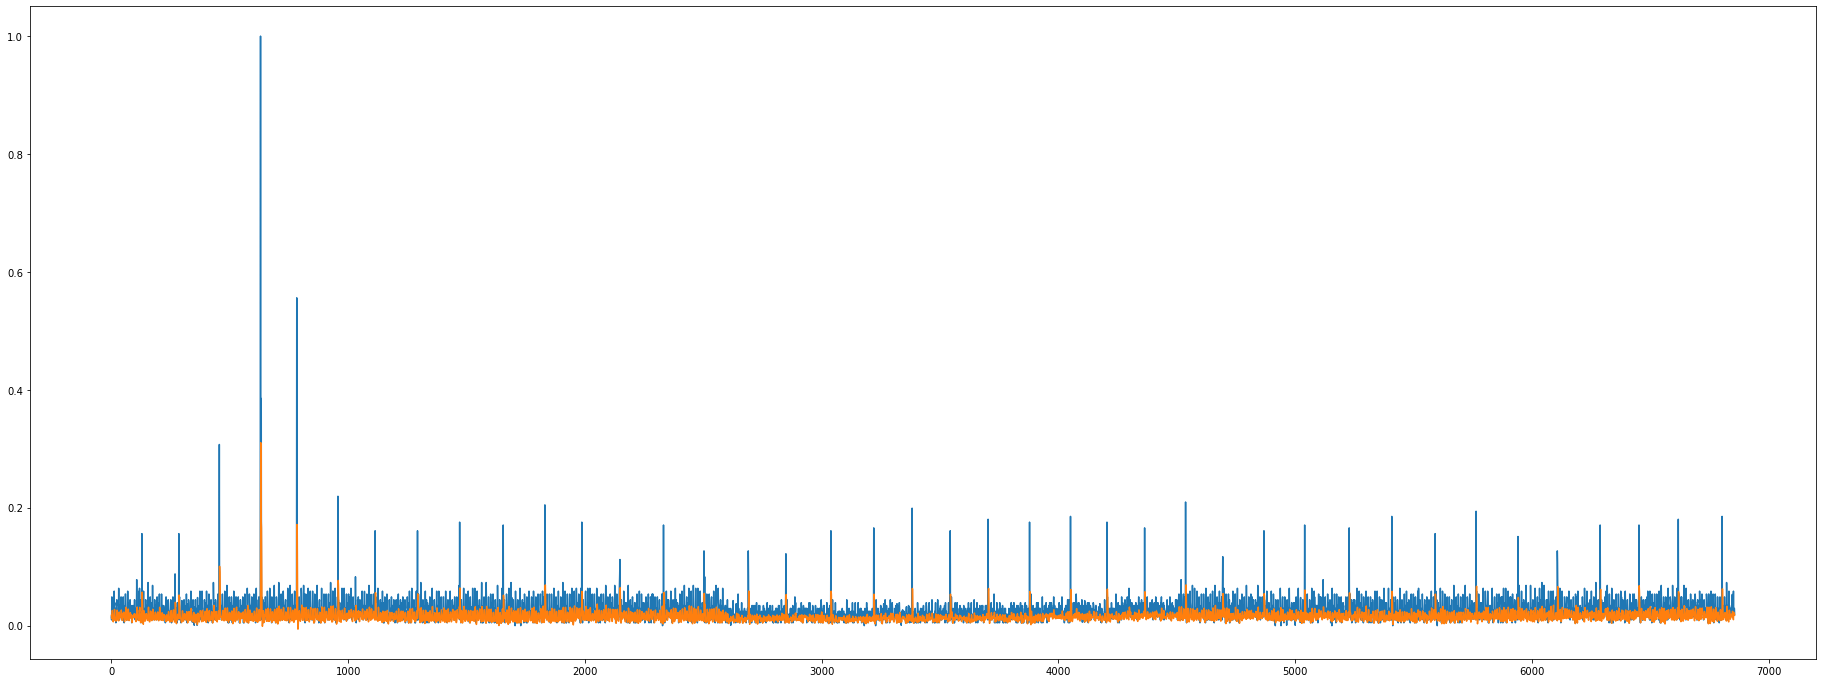

In [39]:
preds = model.predict(X_train)
# preds = scaler.inverse_transform(preds)
plt.rcParams["figure.figsize"] = (32,12)
TestY = pd.DataFrame(y_train)
PredY = pd.DataFrame(preds)

plot_max = plt.figure(1)
plt.plot(TestY)
plt.plot(PredY)
plt.show()